---

## **<font color="Dodgerblue"> Modelación Climática Tropical</font>**
### **<font color="Steelblue"> Mapa de coeficientes de regresión para la precipitación en JJAS con GPCP</font>**


---

In [1]:
#pip install --user seaborn

In [2]:
pip install xarray

Note: you may need to restart the kernel to use updated packages.


import numpy as np
import xarray as xr
#import xarray.ufuncs as xrf
from scipy import stats
import xarray as xr

In [3]:
pip install cftime

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install h5netcdf

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install cartopy

Note: you may need to restart the kernel to use updated packages.


In [6]:
import xarray as xr
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature 
from cartopy.util import add_cyclic_point
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import seaborn as sns
from scipy import stats
from scipy.stats import t

In [7]:
def lineplot_setup(xmin,xmax,xlab,ylab,ymin=None,ymax=None,title=None,legend=False):
    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])
    plt.grid(linestyle='--',alpha=0.66)
    plt.minorticks_on()
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(xlab,fontsize=14)
    plt.ylabel(ylab,fontsize=14)
    plt.title(title,fontsize=15)
    if legend:
        plt.legend(fancybox=True,shadow=True,fontsize=10)

In [8]:
def mapa_MC(data, levels, ccmap, titulo, extend='max', cbarlabel='Coeficiente de regresión', 
            limite_NS=75, lon_min=None, lon_max=None, lat_min=None, lat_max=None):
    lons, lats = data.lon, data.lat
    data, lon = add_cyclic_point(data, coord=lons)
    fig = plt.figure(figsize=(12, 11))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    cs = ax.contourf(lon, lats, data, levels=levels, cmap=ccmap, extend=extend, transform=ccrs.PlateCarree())

    # Definimos la extensión del mapa
    if lon_min is not None and lon_max is not None and lat_min is not None and lat_max is not None:
        ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
    else:
        ax.set_extent([0, 359.1, -limite_NS, limite_NS], crs=ccrs.PlateCarree())

    gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.5, linestyle='--')
    ax.add_feature(cfeature.STATES.with_scale('10m'), edgecolor='k', linewidth=0.5)
    gl.top_labels = gl.right_labels = False
    gl.xlabel_style = {'size': 15}
    gl.ylabel_style = {'size': 15}
    plt.title(titulo, fontsize=18)
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.1)
    # agregar colorbar
    cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.046, pad=0.06)
    cbar.ax.set_xlabel(cbarlabel)
    cbar.ax.xaxis.label.set_size(13)

In [9]:
# Archivo de precipitación GPCP
filename='/home/jovyan/ModClim/datos_actualizados/precip.mon.mean.nc'
ds=xr.open_dataset(filename)
pr=ds['precip']
pr

<xarray.DataArray 'precip' (time: 555, lat: 72, lon: 144)> Size: 23MB
[5754240 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 4kB 1979-01-01 1979-02-01 ... 2025-03-01
  * lat      (lat) float32 288B -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
  * lon      (lon) float32 576B 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
Attributes:
    long_name:                Average Monthly Rate of Precipitation
    valid_range:              [  0. 100.]
    units:                    mm/day
    precision:                32767
    least_significant_digit:  2
    var_desc:                 Precipitation
    dataset:                  GPCP Version 2.3 Combined Precipitation Dataset
    level_desc:               Surface
    statistic:                Mean
    parent_stat:              Mean
    actual_range:             [ 0.       47.327435]

In [10]:
pr.units #las unidades ya están listas

'mm/day'

In [11]:
pr_years = pr.sel(time=slice('1979', '2024'))

In [12]:
jjas = pr_years.where((pr_years.time.dt.month >= 6) & (pr_years.time.dt.month <= 9), drop=True)

In [13]:
mean_jjas = jjas.mean('time')

In [14]:
mean_jjas

<xarray.DataArray 'precip' (lat: 72, lon: 144)> Size: 41kB
array([[0.5653484 , 0.54101014, 0.52246726, ..., 0.57694995, 0.58707666,
        0.59127855],
       [0.39596283, 0.3884928 , 0.36681196, ..., 0.40380958, 0.41079313,
        0.40065014],
       [0.30502588, 0.29501113, 0.26402748, ..., 0.3458111 , 0.35477912,
        0.3379284 ],
       ...,
       [0.7050088 , 0.7141999 , 0.7174045 , ..., 0.7089287 , 0.70398545,
        0.70143557],
       [0.7383701 , 0.7503371 , 0.76125544, ..., 0.74392825, 0.7468126 ,
        0.74703485],
       [0.8334101 , 0.85393447, 0.8437392 , ..., 0.80917567, 0.8251991 ,
        0.82271445]], dtype=float32)
Coordinates:
  * lat      (lat) float32 288B -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
  * lon      (lon) float32 576B 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8

In [15]:
print(mean_jjas.min())
print(mean_jjas.max())

<xarray.DataArray 'precip' ()> Size: 4B
array(0.00122908, dtype=float32)
<xarray.DataArray 'precip' ()> Size: 4B
array(20.493135, dtype=float32)


### **<font color="Steelblue"> Serie de tiempo de la precipitación en México.</font>** 

In [16]:
# Asignamos pesos con la función coseno
lats = jjas.lat
weights = np.cos(np.deg2rad(lats))
weights.name = "weights"

In [17]:
# Aplicamos el peso y luego el promedio espacial
pr_weighted = jjas.weighted(weights)
pr_meanglobal = pr_weighted.mean(dim=['lat', 'lon'])

In [18]:
# Recortamos México
centrolat=jjas.sel(lat=slice(14.25,24))
centrolon=centrolat.sel(lon=slice(254,273.25))

centro_peso=centrolon.weighted(weights)
prcentro=centrolon.mean(["lon","lat"])

pr_annual2=prcentro.resample(time='1Y').mean() # resampleamos a escala anual
#pr_annual2.to_netcdf('GPCP_serie.nc')

/opt/conda/lib/python3.11/site-packages/xarray/groupers.py:530: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(


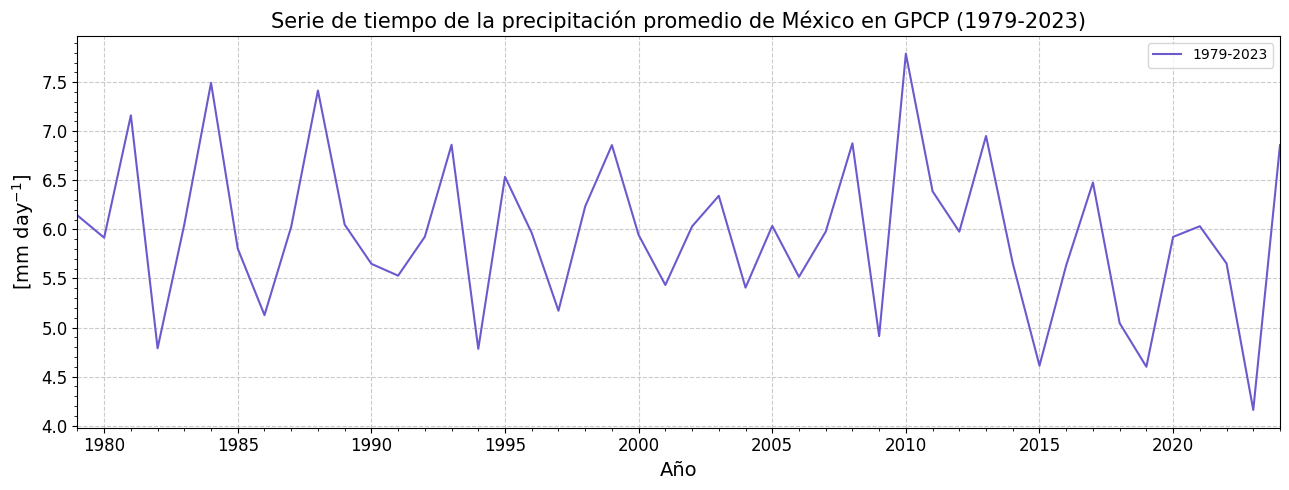

In [19]:
plt.figure(figsize=(13,5))
plt.plot(pr_annual2.time.dt.year,pr_annual2,c='slateblue',label='1979-2023') 
lineplot_setup(1979,2024,'Año','[mm day$^{-1}$]',title='Serie de tiempo de la precipitación promedio de México en GPCP (1979-2023)')
plt.legend()
plt.tight_layout()

### **<font color="Steelblue"> El segundo con coeficientes de regresión pero seleccionando el centro de México.</font>** 

In [20]:
jjas2 = pr_years.where((pr_years.time.dt.month >= 6) & (pr_years.time.dt.month <= 9), drop=True)
jjas2

<xarray.DataArray 'precip' (time: 184, lat: 72, lon: 144)> Size: 8MB
array([[[0.40025383, 0.34795108, 0.34621078, ..., 0.4018895 ,
         0.42617947, 0.4698062 ],
        [0.34051663, 0.3371525 , 0.34920245, ..., 0.34229475,
         0.35928172, 0.38886547],
        [0.35160318, 0.36551303, 0.34649962, ..., 0.39019996,
         0.43633172, 0.4101075 ],
        ...,
        [0.39982226, 0.40422487, 0.40118226, ..., 0.3604558 ,
         0.3675577 , 0.39589337],
        [0.38911846, 0.3938013 , 0.43551448, ..., 0.3819375 ,
         0.3952889 , 0.38754708],
        [0.48018825, 0.48731658, 0.502514  , ..., 0.4427042 ,
         0.494787  , 0.4228968 ]],

       [[0.76156414, 0.73333204, 0.7075794 , ..., 0.86881495,
         0.91359985, 0.8990467 ],
        [0.6876706 , 0.64745694, 0.59479564, ..., 0.626326  ,
         0.70419765, 0.70871574],
        [0.5326506 , 0.51074487, 0.48973408, ..., 0.518493  ,
         0.58836466, 0.5749376 ],
...
        [1.3137335 , 1.4116378 , 1.5569592 , ..., 1.0670863 ,
         1.1311866 , 1.2169312 ],
        [1.1504046 , 1.2081043 , 1.2474699 , ..., 1.0406766 ,
         1.0991638 , 1.1318454 ],
        [0.92505825, 0.92003936, 0.92063636, ..., 0.94018114,
         0.939855  , 0.938342  ]],

       [[0.33081934, 0.3352852 , 0.3304531 , ..., 0.33583042,
         0.32795566, 0.32563072],
        [0.17140025, 0.1516213 , 0.12432416, ..., 0.19904356,
         0.18844718, 0.1845253 ],
        [0.2568182 , 0.22779836, 0.19728042, ..., 0.30874163,
         0.29932725, 0.29017723],
        ...,
        [0.60341024, 0.6276757 , 0.66218394, ..., 0.58007985,
         0.58247936, 0.5799155 ],
        [0.4403135 , 0.4682589 , 0.5131922 , ..., 0.3928175 ,
         0.41114888, 0.41970992],
        [0.59709483, 0.59163076, 0.5908557 , ..., 0.59298164,
         0.6000954 , 0.6021878 ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1kB 1979-06-01 1979-07-01 ... 2024-09-01
  * lat      (lat) float32 288B -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
  * lon      (lon) float32 576B 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
Attributes:
    long_name:                Average Monthly Rate of Precipitation
    valid_range:              [  0. 100.]
    units:                    mm/day
    precision:                32767
    least_significant_digit:  2
    var_desc:                 Precipitation
    dataset:                  GPCP Version 2.3 Combined Precipitation Dataset
    level_desc:               Surface
    statistic:                Mean
    parent_stat:              Mean
    actual_range:             [ 0.       47.327435]

In [21]:
jjas2.lat

<xarray.DataArray 'lat' (lat: 72)> Size: 288B
array([-88.75, -86.25, -83.75, -81.25, -78.75, -76.25, -73.75, -71.25, -68.75,
       -66.25, -63.75, -61.25, -58.75, -56.25, -53.75, -51.25, -48.75, -46.25,
       -43.75, -41.25, -38.75, -36.25, -33.75, -31.25, -28.75, -26.25, -23.75,
       -21.25, -18.75, -16.25, -13.75, -11.25,  -8.75,  -6.25,  -3.75,  -1.25,
         1.25,   3.75,   6.25,   8.75,  11.25,  13.75,  16.25,  18.75,  21.25,
        23.75,  26.25,  28.75,  31.25,  33.75,  36.25,  38.75,  41.25,  43.75,
        46.25,  48.75,  51.25,  53.75,  56.25,  58.75,  61.25,  63.75,  66.25,
        68.75,  71.25,  73.75,  76.25,  78.75,  81.25,  83.75,  86.25,  88.75],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 288B -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
Attributes:
    units:          degrees_north
    actual_range:   [ 88.75 -88.75]
    long_name:      Latitude
    standard_name:  latitude
    axis:           Y

In [22]:
# Seleccionamos el área de mexico 
#area = jjas2.sel(lat=slice(8.75, 34.25))
#arealon = area.sel(lon=slice(240.75, 276.25))

# Seleccionamos la zona de estudio
area = jjas2.sel(lat=slice(13.75,23.75))
arealon = area.sel(lon=slice(253.75,273.5))

#arealon.to_netcdf('GPCP_JJASV3_actualizado.nc')

In [23]:
jjas2.lon

<xarray.DataArray 'lon' (lon: 144)> Size: 576B
array([  1.25,   3.75,   6.25,   8.75,  11.25,  13.75,  16.25,  18.75,  21.25,
        23.75,  26.25,  28.75,  31.25,  33.75,  36.25,  38.75,  41.25,  43.75,
        46.25,  48.75,  51.25,  53.75,  56.25,  58.75,  61.25,  63.75,  66.25,
        68.75,  71.25,  73.75,  76.25,  78.75,  81.25,  83.75,  86.25,  88.75,
        91.25,  93.75,  96.25,  98.75, 101.25, 103.75, 106.25, 108.75, 111.25,
       113.75, 116.25, 118.75, 121.25, 123.75, 126.25, 128.75, 131.25, 133.75,
       136.25, 138.75, 141.25, 143.75, 146.25, 148.75, 151.25, 153.75, 156.25,
       158.75, 161.25, 163.75, 166.25, 168.75, 171.25, 173.75, 176.25, 178.75,
       181.25, 183.75, 186.25, 188.75, 191.25, 193.75, 196.25, 198.75, 201.25,
       203.75, 206.25, 208.75, 211.25, 213.75, 216.25, 218.75, 221.25, 223.75,
       226.25, 228.75, 231.25, 233.75, 236.25, 238.75, 241.25, 243.75, 246.25,
       248.75, 251.25, 253.75, 256.25, 258.75, 261.25, 263.75, 266.25, 268.75,
       271.25, 273.75, 276.25, 278.75, 281.25, 283.75, 286.25, 288.75, 291.25,
       293.75, 296.25, 298.75, 301.25, 303.75, 306.25, 308.75, 311.25, 313.75,
       316.25, 318.75, 321.25, 323.75, 326.25, 328.75, 331.25, 333.75, 336.25,
       338.75, 341.25, 343.75, 346.25, 348.75, 351.25, 353.75, 356.25, 358.75],
      dtype=float32)
Coordinates:
  * lon      (lon) float32 576B 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
Attributes:
    units:          degrees_east
    long_name:      Longitude
    actual_range:   [  1.25 358.75]
    standard_name:  longitude
    axis:           X

In [24]:
mean_precipitation_obs = arealon.groupby('time.year').mean(dim='time').mean(dim=['lat', 'lon']).values

In [25]:
years = np.arange(1979, 2025)

In [26]:
mean_precipitation_obs

array([6.7181826, 6.808089 , 7.2903414, 5.521323 , 7.3690476, 8.433081 ,
       6.4055357, 5.6491346, 6.6072936, 8.3562565, 7.1023836, 6.5933084,
       5.853492 , 6.9908905, 7.793968 , 5.2165475, 7.728795 , 6.952246 ,
       6.124093 , 7.452005 , 7.856125 , 6.8498893, 6.0216346, 6.7805085,
       7.1034193, 6.3585653, 6.7730055, 6.387692 , 6.5596404, 8.039682 ,
       5.5425253, 8.644419 , 7.35011  , 6.5956144, 7.4494066, 6.8009634,
       5.3877473, 6.299327 , 7.0593247, 5.8018975, 5.4035482, 6.5292997,
       6.742091 , 6.755792 , 4.9086556, 7.3571763], dtype=float32)

In [27]:
X2=years
y2=mean_precipitation_obs
#np.save('serie_pr_GPCP.npy',y2)
print(X2,y2)

[1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992
 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006
 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020
 2021 2022 2023 2024] [6.7181826 6.808089  7.2903414 5.521323  7.3690476 8.433081  6.4055357
 5.6491346 6.6072936 8.3562565 7.1023836 6.5933084 5.853492  6.9908905
 7.793968  5.2165475 7.728795  6.952246  6.124093  7.452005  7.856125
 6.8498893 6.0216346 6.7805085 7.1034193 6.3585653 6.7730055 6.387692
 6.5596404 8.039682  5.5425253 8.644419  7.35011   6.5956144 7.4494066
 6.8009634 5.3877473 6.299327  7.0593247 5.8018975 5.4035482 6.5292997
 6.742091  6.755792  4.9086556 7.3571763]


In [28]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [29]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

In [30]:
# Hacemos la prueba con Ordinary Least Squares - obtenido de: https://www.statsmodels.org/dev/examples/notebooks/generated/ols.html 
X = sm.add_constant(X2)  
modelo = sm.OLS(y2, X).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.409
Date:                Sun, 16 Nov 2025   Prob (F-statistic):              0.242
Time:                        02:48:52   Log-Likelihood:                -57.430
No. Observations:                  46   AIC:                             118.9
Df Residuals:                      44   BIC:                             122.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.4991     19.167      1.539      0.1

In [31]:
# Hacemos la prueba de Bresuch-Pagan, obtenida de: https://www.statology.org/breusch-pagan-test-python/
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

#perform Bresuch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(modelo.resid, modelo.model.exog)

lzip(names, test)

[('Lagrange multiplier statistic', np.float64(0.00023866797845251142)),
 ('p-value', np.float64(0.9876740652691386)),
 ('f-value', np.float64(0.00022829229430559173)),
 ('f p-value', np.float64(0.9880132508107039))]

In [32]:
# Calcular pendiente (beta1) y la intersección en el eje y (beta0)
m2 = np.sum((X2 - np.mean(X2)) * (y2 - np.mean(y2))) / np.sum((X2 - np.mean(X2))**2)
b2 =  np.mean(y2) - m2 * np.mean(X2)
m2_siglo=m2*100
m2_siglo
#np.save('pendiente_GPCP.npy',m2_siglo)

np.float64(-1.1367929272176747)

In [33]:
print(f"Pendiente (beta 1): {m2}")
print(f"Pendiente (beta 1 * 100): {m2_siglo}")
print(f"Ordenada al origen (beta 0): {b2}")

Pendiente (beta 1): -0.011367929272176747
Pendiente (beta 1 * 100): -1.1367929272176747
Ordenada al origen (beta 0): 29.49908572741581


In [34]:
predicciones2= b2 + m2 * X2
#np.save('predicciones_GPCP.npy', predicciones2)
predicciones2

array([7.0019537 , 6.99058577, 6.97921784, 6.96784991, 6.95648198,
       6.94511405, 6.93374612, 6.92237819, 6.91101026, 6.89964233,
       6.88827441, 6.87690648, 6.86553855, 6.85417062, 6.84280269,
       6.83143476, 6.82006683, 6.8086989 , 6.79733097, 6.78596304,
       6.77459511, 6.76322718, 6.75185925, 6.74049132, 6.7291234 ,
       6.71775547, 6.70638754, 6.69501961, 6.68365168, 6.67228375,
       6.66091582, 6.64954789, 6.63817996, 6.62681203, 6.6154441 ,
       6.60407617, 6.59270824, 6.58134031, 6.56997239, 6.55860446,
       6.54723653, 6.5358686 , 6.52450067, 6.51313274, 6.50176481,
       6.49039688])

In [35]:
res = stats.linregress(X2, y2)
print(res)

LinregressResult(slope=np.float64(-0.011367929272176745), intercept=np.float64(29.499085727415807), rvalue=np.float64(-0.17616940416610444), pvalue=np.float64(0.24154115046582234), stderr=np.float64(0.00957587429993394), intercept_stderr=np.float64(19.166534027426206))


In [36]:
# Otro modo de imprimir el pvalue
print(f"P-valor: {res.pvalue:.5f}")

P-valor: 0.24154


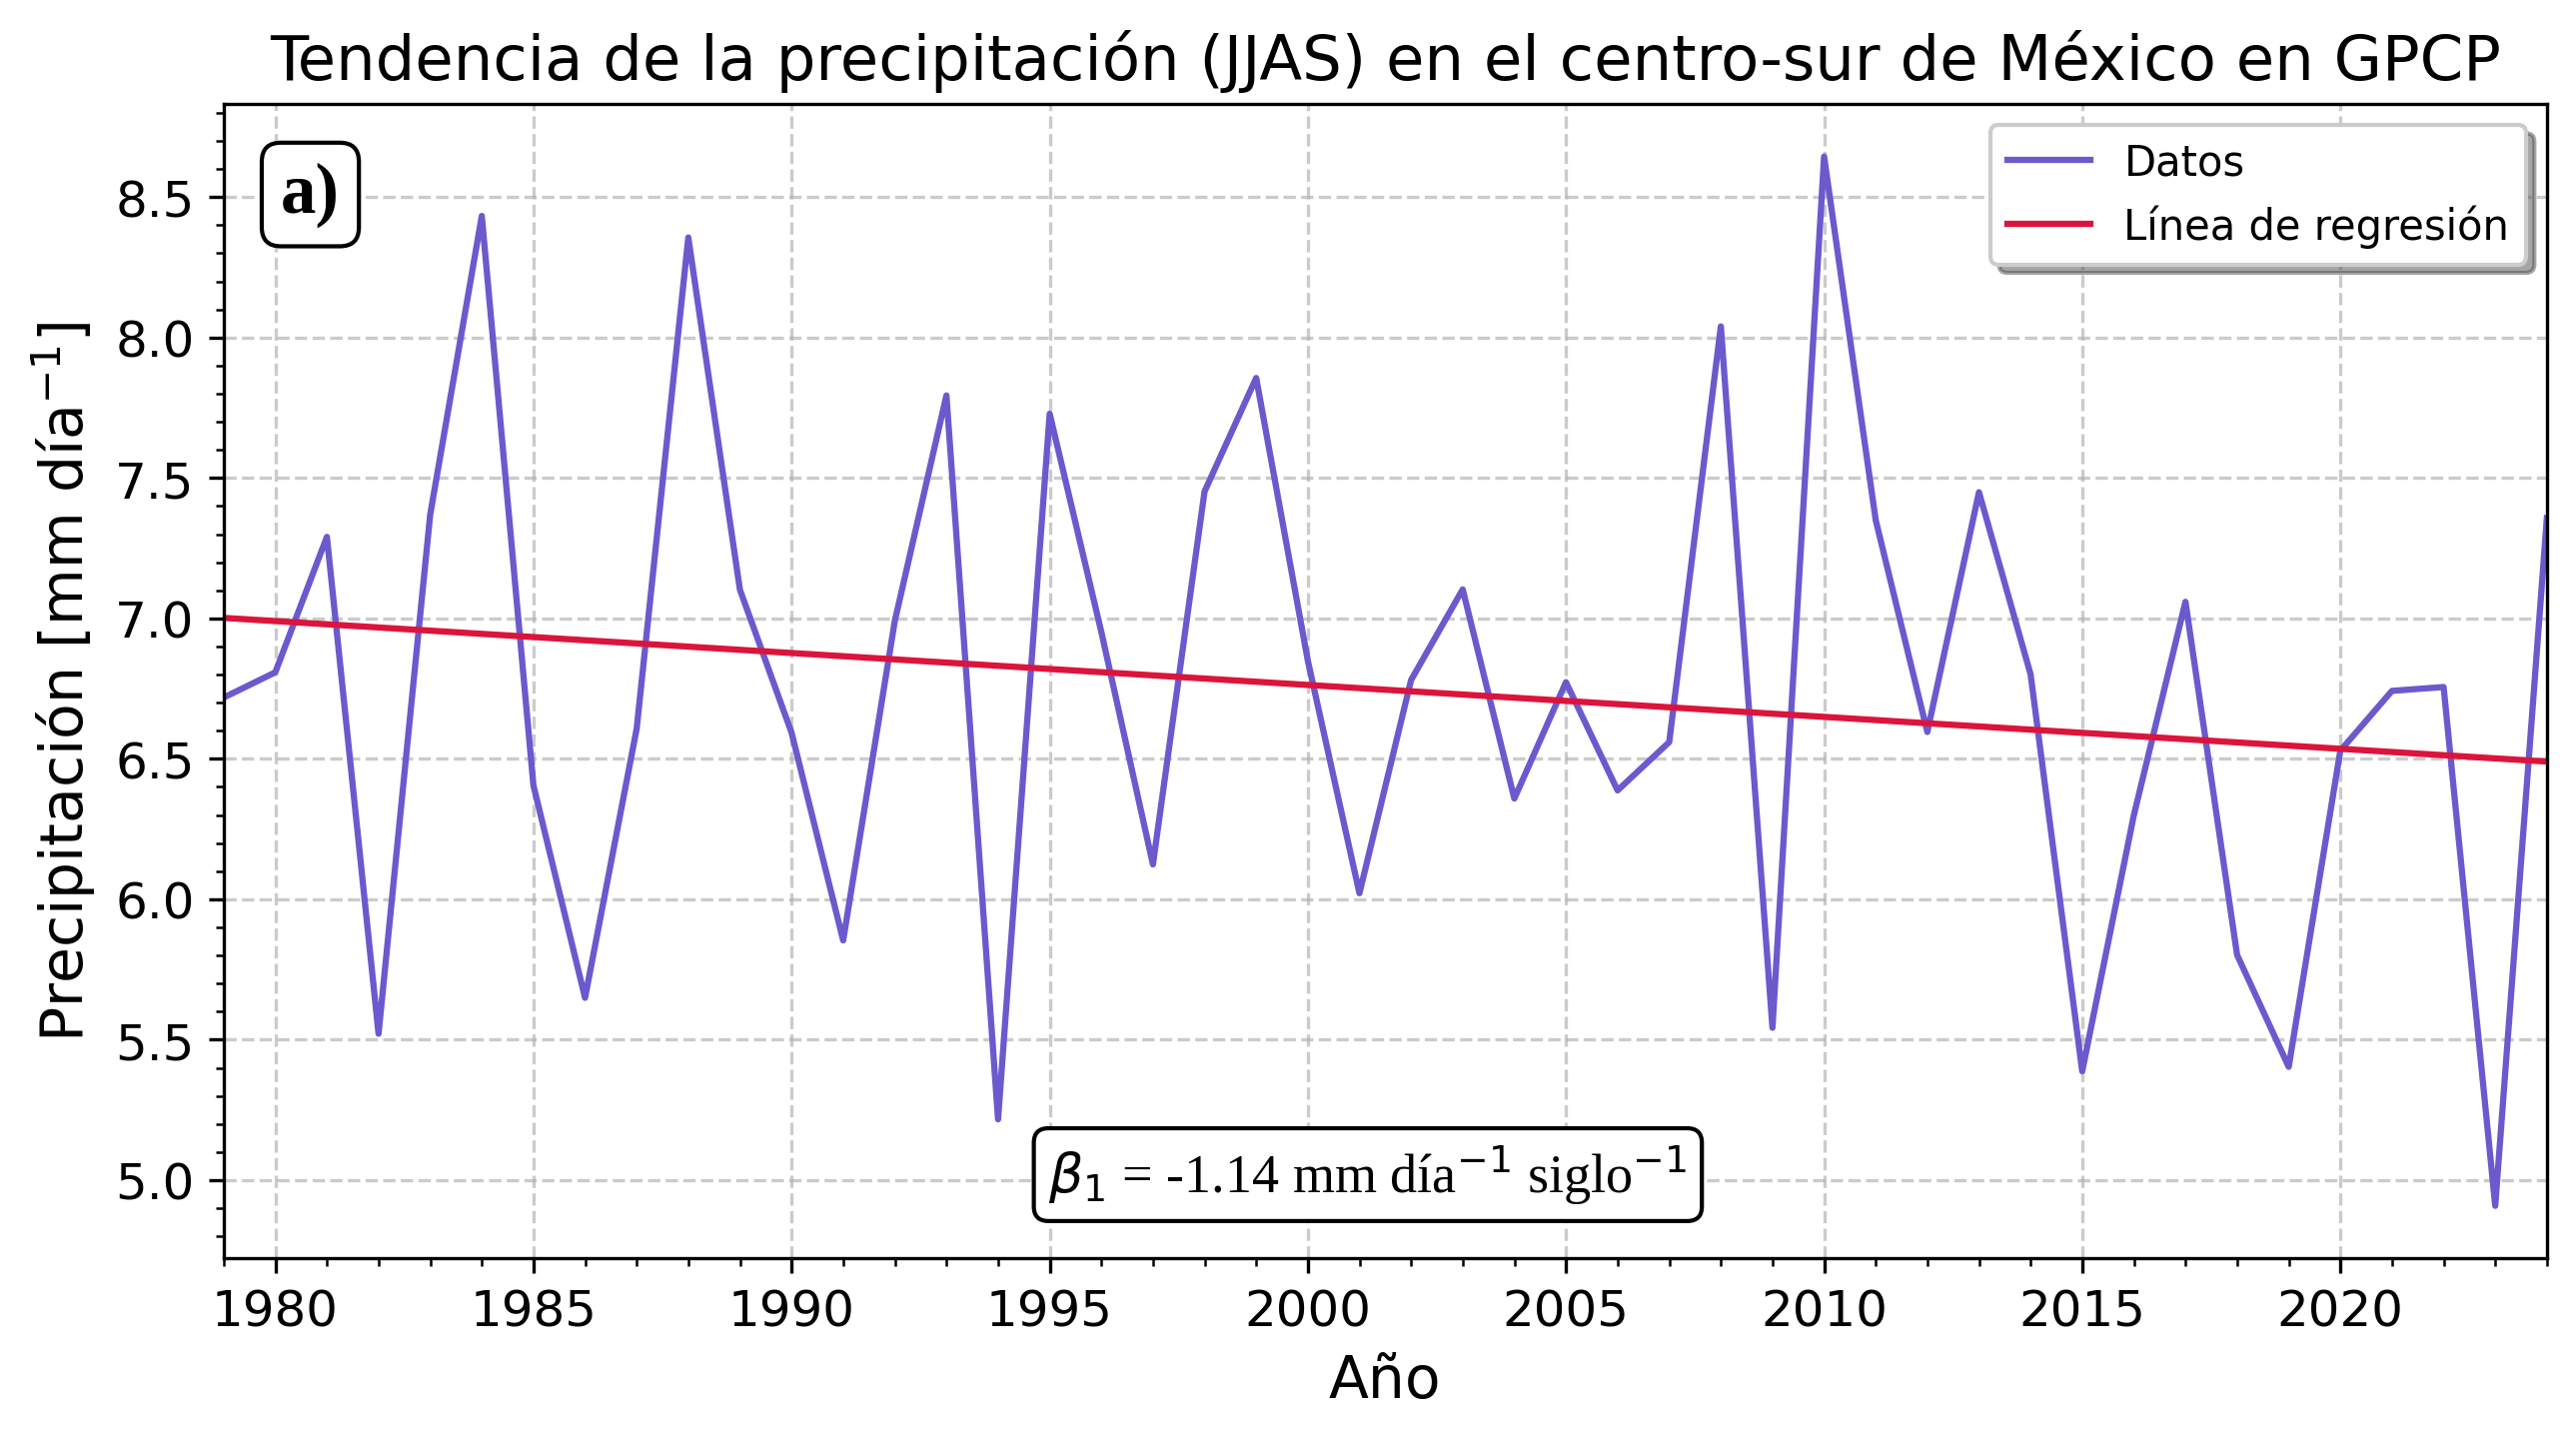

In [37]:
from matplotlib.lines import Line2D

# Graficamos los datos y la línea de regresión
plt.figure(figsize=(10,5), dpi=300)
plt.plot(X2, y2, color='slateblue', label='Datos')
plt.plot(X2, predicciones2, color='crimson', label='Línea de regresión')
plt.text(0.05, 0.95, 'a)', transform=plt.gca().transAxes, fontsize=17, fontname='Liberation Serif', fontweight='bold', va='top', ha='right',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.27', linewidth=1))
lineplot_setup(1979,2024,'Año','Precipitación [mm día$^{-1}$]',title='Tendencia de la precipitación (JJAS) en el centro-sur de México en GPCP',legend=True)

plt.text(0.63, 0.1, r'$\beta_1$ = -1.14 mm día$^{-1}$ siglo$^{-1}$', transform=plt.gca().transAxes, fontsize=13, fontname='Liberation Serif', fontweight='normal', va='top', ha='right',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.27', linewidth=1))

ax = plt.gca()  

### **<font color="Steelblue"> Matriz de coeficientes de regresión seleccionando el centro de México.</font>** 

In [38]:
# hacemos una funcion para los coeficientes de regresión
def reg_coef(X,y):
    m=np.sum((X - np.mean(X)) * (y - np.mean(y))) / np.sum((X - np.mean(X))**2)
    b = np.mean(y) - m * np.mean(X)
    return m,b

# Se inicializa la matriz
coef_matriz_m = np.zeros((len(arealon.lat), len(arealon.lon)))
coef_matriz_b = np.zeros((len(arealon.lat), len(arealon.lon)))

for i, lat in enumerate(arealon.lat):
    for j, lon in enumerate(arealon.lon):
        # Calculamos los coeficientes de regresión 
        y = arealon.sel(lat=lat, lon=lon).groupby('time.year').mean(dim='time').values
        X = years
        m,b = reg_coef(X,y)
        
        # Guardamos en la matriz m y b
        coef_matriz_m[i, j] = m
        coef_matriz_b[i, j] = b

In [39]:
print(m)

0.0070830007559570165


In [40]:
print(i, j, lon, lat) 

4 7 <xarray.DataArray 'lon' ()> Size: 4B
array(271.25, dtype=float32)
Coordinates:
    lon      float32 4B 271.2
Attributes:
    units:          degrees_east
    long_name:      Longitude
    actual_range:   [  1.25 358.75]
    standard_name:  longitude
    axis:           X <xarray.DataArray 'lat' ()> Size: 4B
array(23.75, dtype=float32)
Coordinates:
    lat      float32 4B 23.75
Attributes:
    units:          degrees_north
    actual_range:   [ 88.75 -88.75]
    long_name:      Latitude
    standard_name:  latitude
    axis:           Y


In [41]:
print(coef_matriz_m.shape)  
print(len(arealon.lat), len(arealon.lon))  

(5, 8)
5 8


In [42]:
print(np.nanmin(coef_matriz_m), np.nanmax(coef_matriz_m))

-0.08144529476748033 0.02751957443147907


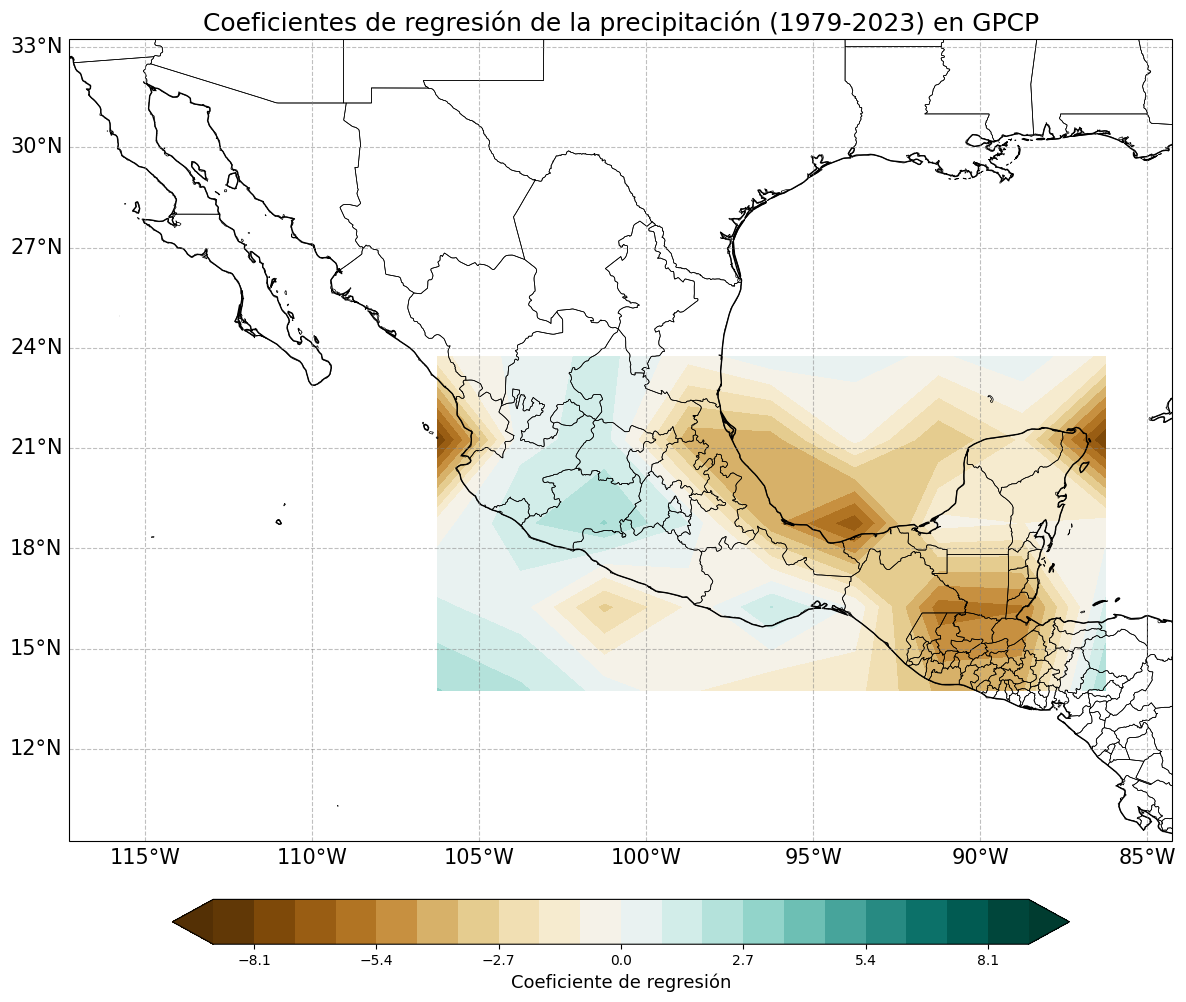

In [43]:
# DataArray con coordenadas
matriz_m_da = xr.DataArray(coef_matriz_m, coords=[arealon.lat, arealon.lon], dims=["lat", "lon"])
# Guardamos la matriz de coeficientes de regresión en netcdf
#matriz_m_da.to_netcdf('coeficientes_regresion_GPCPV3_actualizado.nc')

# Configuramos los levels
levels = np.linspace(-9, 9, 21)  

# Graficar la matriz de m´s 
mapa_MC(matriz_m_da*100, levels, 'BrBG', 'Coeficientes de regresión de la precipitación (1979-2023) en GPCP', 
        extend='both', lon_min=242.75, lon_max=275.75, lat_min=9.25, lat_max=33.25)